In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import os
print(os.getcwd())

/home/ec2-user/SageMaker


In [17]:
import pandas as pd


data_atractivos = pd.read_csv("/home/ec2-user/SageMaker/Untitled Folder/atractivos_turisticos_mr.csv", encoding='latin1')
print(data_atractivos.head())

   OBJECTID                                     Shape imperdible  cod_comuna  \
0         1   (4713317.744900001, 2246254.5177000016)         NO          15   
1         2   (4713559.109200001, 2245875.2638000026)         NO          15   
2         3         (4716641.4362, 2250356.483500004)         NO          10   
3         4   (4716008.103700001, 2249319.9003000017)         NO          10   
4         5  (4713705.0748000005, 2249459.4629000034)         NO          11   

                             direccion                barrio   latitud  \
0                    CR 70 No. 16 - 04  Parque Juan Pablo II  6.222290   
1                 CR 65 A No. 13 - 157  Parque Juan Pablo II  6.218872   
2                      CR 50 No. 62-99                 Prado  6.259521   
3                  CR 49 a No. 50 - 85         La Candelaria  6.250122   
4  CR 70 entre la CL 47D y circular 1A         Florida Nueva  6.251282   

    longitud    cod                                    nombre_sitio  \
0 -

In [18]:
# Cargar archivo "pot48_2014_corredores.csv"
data_corredores = pd.read_csv("/home/ec2-user/SageMaker/Untitled Folder/pot48_2014_corredores_ver.csv", encoding='latin1')
print(data_corredores.head())

   OBJECTID                                     Shape      actuacion  \
0         1    (4716111.922535565, 2250160.293627629)   Recuperación   
1         2     (4710734.844659457, 2249928.98087332)  Mantenimiento   
2         3   (4713279.745090966, 2249317.9404497137)     Generación   
3         4  (4713163.2770750625, 2248113.3829346504)   Recuperación   
4         5    (4713665.402632455, 2248268.736336306)  Mantenimiento   

                                  tramo                             nombre  \
0                Calle 54 y la Calle 64  Av. Juan del Corral (Carrera 51D)   
1          Calle San Juan y la Calle 40                 Quebrada La Salada   
2    1er parque de Laureles y Calle 47D                         Carrera 73   
3  Sistema vial del Río y la Carrera 84                             Av. 33   
4  Sistema vial del Río y la Carrera 76                    Av. Bolivariana   

        fecha_adopcion  fecha_actualizacion  Shape_Length  
0  2014-12-17 00:00:00  2014-12-17 00:

In [19]:
# Cargar archivo "pot48_2014_ciclorrutas.csv"
data_ciclorrutas = pd.read_csv("/home/ec2-user/SageMaker/Untitled Folder/pot48_2014_ciclorrutas.csv", encoding='latin1')
print(data_ciclorrutas.head())

   OBJECTID                                    Shape                 nombre  \
0         1   (4715074.964116955, 2247227.873646558)               Calle 29   
1         2   (4713718.045674914, 2245148.291687634)  Ciclorruta Carrera 65   
2         3  (4711677.835081041, 2248737.4224555227)      Ciclorruta Fase 3   
3         4   (4715622.395321323, 2249052.339637848)      Ciclorruta Fase 3   
4         5   (4712326.07855426, 2247333.5593407555)              Calle 30A   

               label      estado       fecha_adopcion  fecha_actualizacion  \
0           Calle 29  Proyectado  2014-12-17 00:00:00  2014-12-17 00:00:00   
1         Carrera 65   Existente  2014-12-17 00:00:00  2014-12-17 00:00:00   
2  Ciclorruta Fase 3  Proyectado  2014-12-17 00:00:00  2014-12-17 00:00:00   
3  Ciclorruta Fase 3  Proyectado  2014-12-17 00:00:00  2014-12-17 00:00:00   
4          Calle 30A  Proyectado  2014-12-17 00:00:00  2014-12-17 00:00:00   

   Shape_Length  
0   1688.829602  
1    424.302070  
2 

In [20]:
# Cargar archivo "ecoparques.csv"
data_ecoparques = pd.read_csv("/home/ec2-user/SageMaker/Untitled Folder/ecoparques.csv", encoding='latin1')
print(data_ecoparques.head())

   OBJECTID                                    Shape  \
0         1   (4713758.666992249, 2253874.440853794)   
1         2  (4714894.835791891, 2250276.3641353357)   
2         3   (4710338.809874485, 2252829.635570108)   
3         4  (4710073.107410448, 2252662.9306986798)   
4         5   (4711265.702843832, 2252685.050076989)   

                        nombre            quebrada_asociada  \
0      Ecoparque La Quintana 2               Q. La Quintana   
1          Ecoparque La Iguana                 Q. La Iguaná   
2       Ecoparque El Chagualon  Q. La Merced o El Chagualón   
3        Ecoparque La Chaguala               Q. La Chaguala   
4  Ecoparque Mirador del Valle   Q. La Puerta o Las Hamacas   

                 dominio  funcion  categoria  \
0  Bienes de uso público  Parques  Ecoparque   
1  Bienes de uso público  Parques  Ecoparque   
2  Bienes de uso público  Parques  Ecoparque   
3  Bienes de uso público  Parques  Ecoparque   
4  Bienes de uso público  Parques  Ecoparque

In [21]:
!pip install matplotlib
!pip install seaborn

In [22]:
!pip install folium

In [23]:
import folium

# Crea un mapa centrado en una ubicación promedio de los datos
mapa = folium.Map(location=[data_atractivos['latitud'].mean(), data_atractivos['longitud'].mean()], zoom_start=12)

# Agrega un marcador para cada atractivo
for idx, row in data_atractivos.iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=row['nombre_sitio'],
        tooltip=row['tipo_atractivo']
    ).add_to(mapa)

# Muestra el mapa
mapa

In [ ]:
!unzip shp_rio_medellin.zip

Archive:  shp_rio_medellin.zip
replace rio_medellin.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Axes: >

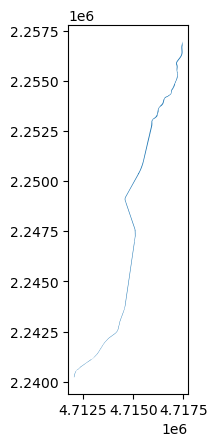

In [12]:
import geopandas as gpd

gdf = gpd.read_file("rio_medellin.shp")
gdf.plot()

In [13]:
import osrm
import folium

# Coordenadas de inicio y fin
start = (40.748817, -73.985428)  # Ejemplo: Empire State Building
end = (40.761435, -73.977621)  # Ejemplo: Times Square

# Realizar la solicitud para obtener la ruta
route = osrm.simple_route(start, end)

# Crear un mapa
m = folium.Map(location=[start[0], start[1]], zoom_start=14)

# Dibujar la ruta en el mapa
folium.PolyLine(locations=route['routes'][0]['geometry'], color='blue', weight=5, opacity=0.7).add_to(m)

# Añadir marcadores en el punto de inicio y fin
folium.Marker([start[0], start[1]], popup="Inicio", icon=folium.Icon(color='green')).add_to(m)
folium.Marker([end[0], end[1]], popup="Destino", icon=folium.Icon(color='red')).add_to(m)

# Guardar el mapa
m.save("ruta_osrm.html")

ModuleNotFoundError: No module named 'osrm'

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en las coordenadas promedio de los datos
mapa_calor = folium.Map(location=[data_atractivos['latitud'].mean(), data_atractivos['longitud'].mean()], zoom_start=12)

# Preparar los datos para el mapa de calor
heat_data = [[row['latitud'], row['longitud']] for index, row in data_atractivos.iterrows()]

# Agregar capa de mapa de calor
HeatMap(heat_data).add_to(mapa_calor)

# Mostrar el mapa
mapa_calor

In [ ]:
# Análisis de popularidad por tipo de atractivo
# Contamos las ocurrencias de cada tipo de atractivo para ver cuáles son los más comunes

tipo_atractivo_counts = data_atractivos['tipo_atractivo'].value_counts()

# Gráfico de barras para visualizar la popularidad por tipo de atractivo
plt.figure(figsize=(12, 6))
sns.barplot(y=tipo_atractivo_counts.index, x=tipo_atractivo_counts.values, palette="viridis")
plt.title("Popularidad por Tipo de Atractivo")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo de Atractivo")
plt.show()

tipo_atractivo_counts

In [ ]:
# Crear una tabla cruzada para mostrar la cantidad de cada tipo de atractivo por comuna
tipo_comuna = pd.crosstab(data_atractivos['nombre_comuna'], data_atractivos['tipo_atractivo'])

# Visualizar la tabla cruzada con un mapa de calor para identificar patrones geográficos en la concentración de tipos de atractivos
plt.figure(figsize=(14, 10))
sns.heatmap(tipo_comuna, cmap="YlGnBu", annot=False, cbar=True, linewidths=.5)
plt.title("Distribución de Tipos de Atractivos por Comuna")
plt.xlabel("Tipo de Atractivo")
plt.ylabel("Nombre de la Comuna")
plt.show()

tipo_comuna

Para sugerir rutas turísticas, podemos agrupar los atractivos cercanos geográficamente, utilizando las coordenadas de latitud y longitud. Esto permite crear clusters de lugares cercanos que los turistas podrían visitar en una misma ruta. Un análisis de este tipo requiere:

1. *Definir clusters geográficos* de atractivos, para lo cual usaremos el algoritmo de clustering KMeans.
2. *Sugerir rutas* dentro de cada cluster, listando los atractivos cercanos entre sí.

Voy a implementar el análisis de rutas turísticas sugeridas basado en estos pasos.

Aquí tienes las rutas turísticas sugeridas basadas en la proximidad de los atractivos:

### Ruta 1 (Área Central - La Candelaria, Laureles):
Incluye atractivos culturales como el *Museo de Antioquia, **Plaza Botero, **Parque de los Pies Descalzos* y sitios históricos en La Candelaria.

### Ruta 2 (El Poblado y Guayabal):
Abarca zonas populares como *Parque de El Poblado, **Parque Lleras, **Museo de Arte Moderno* y *Aeroparque Parque Juan Pablo II*.

### Ruta 3 (Arví y Popular):
Enfocada en la naturaleza, incluye *Parque Regional Ecoturístico Arví* y el *Parque Biblioteca España* en el barrio Santo Domingo.

### Ruta 4 (Zona Norte - Aranjuez y Robledo):
Destaca atractivos como *Jardín Botánico Joaquín Antonio Uribe, **Parque Explora, **Cerro El Volador* y el *Planetario Municipal de Medellín*.

### Ruta 5 (Comuna 13 - San Javier):
Incluye las *Escaleras Eléctricas de la Comuna 13, el **Museo Etnográfico Madre Laura* y el *Monumento Paloma de la Paz*.

Estas rutas agrupan sitios cercanos entre sí y son ideales para explorar la ciudad de manera temática o geográfica. ¿Te gustaría algún detalle adicional o enfoque específico para las rutas?

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters (rutas). Vamos a sugerir 5 rutas, pero este número se puede ajustar.
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Ajustar el modelo KMeans en las coordenadas de latitud y longitud
data_atractivos['cluster'] = kmeans.fit_predict(data_atractivos[['latitud', 'longitud']])

# Asignar cada atractivo a un cluster
clustered_atractivos = data_atractivos.groupby('cluster')[['nombre_sitio', 'direccion', 'latitud', 'longitud', 'nombre_comuna', 'barrio', 'tipo_atractivo']]

# Mostrar los atractivos en cada cluster (ruta)
rutas_sugeridas = {}
for cluster_id, sitios in clustered_atractivos:
    rutas_sugeridas[f"Ruta {cluster_id + 1}"] = sitios[['nombre_sitio', 'direccion', 'nombre_comuna', 'barrio', 'tipo_atractivo']].to_dict(orient="records")

rutas_sugeridas

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Crear un mapa centrado en el área promedio de los atractivos turísticos
mapa_rutas = folium.Map(location=[data_atractivos['latitud'].mean(), data_atractivos['longitud'].mean()], zoom_start=12)

# Definir colores para cada ruta
colores_ruta = ["red", "blue", "green", "purple", "orange"]

# Agregar los puntos de cada ruta al mapa con un color distinto
for cluster_id, sitios in clustered_atractivos:
    # Crear un marcador de agrupación para cada ruta
    marker_cluster = MarkerCluster(name=f"Ruta {cluster_id + 1}", overlay=True).add_to(mapa_rutas)
    
    for _, row in sitios.iterrows():
        folium.Marker(
            location=[row['latitud'], row['longitud']],
            popup=f"{row['nombre_sitio']}<br>Dirección: {row['direccion']}<br>Tipo: {row['tipo_atractivo']}",
            tooltip=row['nombre_sitio'],
            icon=folium.Icon(color=colores_ruta[cluster_id])
        ).add_to(marker_cluster)

# Agregar capa de control para alternar entre rutas
folium.LayerControl().add_to(mapa_rutas)

# Mostrar el mapa
mapa_rutas

mapa interactivo con las rutas turísticas sugeridas. Cada ruta está representada por un color diferente, y puedes hacer clic en los marcadores para ver el nombre, dirección y tipo de cada atractivo.

In [ ]:
# Análisis de accesibilidad y servicios
# Crear un resumen de la cantidad de atractivos por comuna y tipo para ver qué áreas tienen la mayor accesibilidad

accesibilidad_comuna = data_atractivos.groupby('nombre_comuna').size()
accesibilidad_tipo = data_atractivos.groupby('tipo_atractivo').size()

# Crear gráficos para visualizar la cantidad de atractivos en cada comuna y tipo
# Gráfico de barras para la accesibilidad por comuna
plt.figure(figsize=(12, 6))
sns.barplot(y=accesibilidad_comuna.index, x=accesibilidad_comuna.values, palette="viridis")
plt.title("Accesibilidad por Comuna (Número de Atractivos)")
plt.xlabel("Cantidad de Atractivos")
plt.ylabel("Nombre de la Comuna")
plt.show()

# Gráfico de barras para la accesibilidad por tipo de atractivo
plt.figure(figsize=(12, 8))
sns.barplot(y=accesibilidad_tipo.index, x=accesibilidad_tipo.values, palette="viridis")
plt.title("Accesibilidad por Tipo de Atractivo (Número de Atractivos)")
plt.xlabel("Cantidad de Atractivos")
plt.ylabel("Tipo de Atractivo")
plt.show()

(accesibilidad_comuna, accesibilidad_tipo)

In [ ]:
# Contar la cantidad de atractivos por barrio para identificar los barrios con mayor frecuencia de atractivos
frecuencia_barrio = data_atractivos['barrio'].value_counts().head(10)

# Gráfico de barras para visualizar los barrios con más atractivos turísticos
plt.figure(figsize=(12, 6))
sns.barplot(y=frecuencia_barrio.index, x=frecuencia_barrio.values, palette="magma")
plt.title("Frecuencia de Atractivos en Barrios Específicos (Top 10)")
plt.xlabel("Cantidad de Atractivos")
plt.ylabel("Barrio")
plt.show()

frecuencia_barrio

In [ ]:
import pandas as pd

# Mostrar las parejas de atractivos cercanos (dentro de 1 km)
prox_df = pd.DataFrame(prox_pairs, columns=["Atractivo 1", "Atractivo 2", "Distancia (km)"]).drop_duplicates()

# Mostrar el DataFrame en el notebook
prox_df

In [ ]:
import folium

# Crear un mapa centrado en el área promedio de los atractivos
mapa_proximidad = folium.Map(location=[data_atractivos['latitud'].mean(), data_atractivos['longitud'].mean()], zoom_start=12)

# Añadir marcadores y líneas de conexión para los atractivos cercanos
for _, row in prox_df.iterrows():
    # Localización del primer atractivo
    lat1 = data_atractivos.loc[data_atractivos['nombre_sitio'] == row['Atractivo 1'], 'latitud'].values[0]
    lon1 = data_atractivos.loc[data_atractivos['nombre_sitio'] == row['Atractivo 1'], 'longitud'].values[0]
    
    # Localización del segundo atractivo
    lat2 = data_atractivos.loc[data_atractivos['nombre_sitio'] == row['Atractivo 2'], 'latitud'].values[0]
    lon2 = data_atractivos.loc[data_atractivos['nombre_sitio'] == row['Atractivo 2'], 'longitud'].values[0]
    
    # Añadir marcadores
    folium.Marker(location=[lat1, lon1], popup=row['Atractivo 1'], tooltip=row['Atractivo 1'], icon=folium.Icon(color='blue')).add_to(mapa_proximidad)
    folium.Marker(location=[lat2, lon2], popup=row['Atractivo 2'], tooltip=row['Atractivo 2'], icon=folium.Icon(color='green')).add_to(mapa_proximidad)
    
    # Añadir una línea de conexión entre los dos atractivos
    folium.PolyLine(locations=[[lat1, lon1], [lat2, lon2]], color="red", weight=2.5, opacity=0.8).add_to(mapa_proximidad)

# Mostrar el mapa
mapa_proximidad

In [ ]:
import folium
import ast

# Crear el mapa centrado en Medellín con ajustes de grosor
medellin_map = folium.Map(location=[6.2442, -75.5812], zoom_start=12)

# Ajuste en el grosor de las líneas para mejor visibilidad
for _, row in data_ciclorrutas.iterrows():
    try:
        # Convertir la cadena de texto de coordenadas a una tupla
        coord = ast.literal_eval(row['Shape'])
        lat, lon = coord[1], coord[0]  # Invertir el orden para latitud y longitud

        # Definir color basado en el estado
        color = 'green' if row['estado'] == 'Existente' else 'blue'
        
        # Agregar un marcador con mayor grosor
        folium.CircleMarker(
            location=[lat, lon],
            radius=7,  # Radio más grande para mayor visibilidad
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['nombre']} - {row['estado']}"
        ).add_to(medellin_map)
    except:
        continue

# Mostrar el mapa actualizado
medellin_map

In [ ]:
!pip install geopandas

In [ ]:
!pip install geopandas shapely

In [ ]:
# Identificar valores que no empiezan con un tipo WKT conocido
invalid_shapes_ciclorrutas = data_ciclorrutas[~data_ciclorrutas['Shape'].str.startswith(('POINT', 'LINESTRING', 'POLYGON'))]
invalid_shapes_corredores = data_corredores[~data_corredores['Shape'].str.startswith(('POINT', 'LINESTRING', 'POLYGON'))]

# Mostrar los primeros valores no válidos
print("Valores no válidos en ciclorrutas:")
print(invalid_shapes_ciclorrutas['Shape'].head())
print("\nValores no válidos en corredores verdes:")
print(invalid_shapes_corredores['Shape'].head())

In [ ]:
# Filtrar filas con datos válidos en la columna 'Shape'
data_ciclorrutas = data_ciclorrutas[data_ciclorrutas['Shape'].str.startswith(('POINT', 'LINESTRING', 'POLYGON'))]
data_corredores = data_corredores[data_corredores['Shape'].str.startswith(('POINT', 'LINESTRING', 'POLYGON'))]

In [ ]:
from shapely import wkt

# Convertir la columna 'Shape' en geometría WKT para ciclorrutas y corredores verdes
data_ciclorrutas['geometry'] = data_ciclorrutas['Shape'].apply(wkt.loads)
data_corredores['geometry'] = data_corredores['Shape'].apply(wkt.loads)

In [ ]:
from shapely import wkt

# Convertir la columna 'Shape' en geometría WKT para ciclorrutas y corredores verdes
data_ciclorrutas['geometry'] = data_ciclorrutas['Shape'].apply(wkt.loads)
data_corredores['geometry'] = data_corredores['Shape'].apply(wkt.loads)

In [ ]:
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Convertir la columna 'Shape' en geometría WKT para ciclorrutas y corredores verdes
data_ciclorrutas['geometry'] = data_ciclorrutas['Shape'].apply(wkt.loads)
data_corredores['geometry'] = data_corredores['Shape'].apply(wkt.loads)

# Crear el GeoDataFrame para ciclorrutas y corredores verdes
data_ciclorrutas_gdf = gpd.GeoDataFrame(data_ciclorrutas, geometry='geometry')
data_corredores_gdf = gpd.GeoDataFrame(data_corredores, geometry='geometry')

# Crear geometría de puntos en atractivos turísticos con latitud y longitud
data_atractivos['geometry'] = data_atractivos.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)
data_atractivos_gdf = gpd.GeoDataFrame(data_atractivos, geometry='geometry')

# Establecer sistema de coordenadas (usualmente WGS84)
data_ciclorrutas_gdf.set_crs('EPSG:4326', inplace=True)
data_corredores_gdf.set_crs('EPSG:4326', inplace=True)
data_atractivos_gdf.set_crs('EPSG:4326', inplace=True)

print("Datos preparados para análisis geoespacial")

In [ ]:
# Unir ciclorrutas con corredores verdes donde se intersectan
ciclorrutas_verdes = gpd.sjoin(data_ciclorrutas_gdf, data_corredores_gdf, how="inner", predicate='intersects')

In [ ]:
# Reproyectar los GeoDataFrames a EPSG:3116 para mejorar la precisión en cálculos de distancia
data_ciclorrutas_gdf = data_ciclorrutas_gdf.to_crs("EPSG:3116")
data_corredores_gdf = data_corredores_gdf.to_crs("EPSG:3116")
data_atractivos_gdf = data_atractivos_gdf.to_crs("EPSG:3116")

In [ ]:
# Realizar sjoin_nearest con el CRS proyectado para encontrar ciclorrutas cercanas a atractivos turísticos
ciclorrutas_atractivos = gpd.sjoin_nearest(data_ciclorrutas_gdf, data_atractivos_gdf, how="inner", distance_col="distance")

# Filtrar las ciclorrutas que están dentro de una distancia razonable, por ejemplo, 500 metros (ajustado según el CRS)
ciclorrutas_sostenibles = ciclorrutas_atractivos[ciclorrutas_atractivos['distance'] <= 500]  # Ajusta la distancia según el CRS si es necesario

In [ ]:
# Filtrar filas con geometría no nula y válida en cada GeoDataFrame
data_ciclorrutas_gdf = data_ciclorrutas_gdf[data_ciclorrutas_gdf['geometry'].notna() & data_ciclorrutas_gdf.is_valid]
data_corredores_gdf = data_corredores_gdf[data_corredores_gdf['geometry'].notna() & data_corredores_gdf.is_valid]
data_atractivos_gdf = data_atractivos_gdf[data_atractivos_gdf['geometry'].notna() & data_atractivos_gdf.is_valid]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
data_corredores_gdf.plot(ax=ax, color='lightgreen', label='Corredores Verdes')
data_ciclorrutas_gdf.plot(ax=ax, color='blue', label='Ciclorrutas')
data_atractivos_gdf.plot(ax=ax, color='red', marker='*', markersize=50, label='Atractivos Turísticos')
ciclorrutas_sostenibles.plot(ax=ax, color='orange', label='Ciclorrutas Sostenibles')

plt.legend()
plt.title("Identificación de Rutas Sostenibles para Ecoturismo")
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Crear un DataFrame con tus datos
data = {
    'Nombre': ['RÍO MEDELLÍN'],
    'Valor1': [21419.8118706],
    'Valor2': [37655.520022972356],
    'Valor3': [542727.5764549156],
    'geometry': [Point(4715462.667622095, 2249778.1504221247)]  # Coordenadas X, Y
}

df = pd.DataFrame(data)

# Crear un GeoDataFrame con el sistema de referencia de coordenadas EPSG:32718 (UTM)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:32718")

# Verificar el GeoDataFrame
gdf.head()

In [ ]:
import folium

# Crear un mapa centrado en Medellín
medellin_coords = (6.2518, -75.5636)
mi_mapa = folium.Map(location=medellin_coords, zoom_start=13)

# Crear un objeto GeoJson a partir de tus datos
geo_json = {
    "type": "Feature",
    "geometry": {
        "type": "LineString",
        "coordinates": [
            (4715462.667622095,2249778.1504221247)  # Coordenadas invertidas (lat, lon)
        ]
    },
    "properties": {
        "OBJECTID": 1,
        "nmgrio": "RÍO MEDELLÍN120123812",
        "shape_leng": 21419.8118706,
        "Shape_Length": 37655.520022972356,
        "Shape_Area": 542727.5764549156
    }
}

# Agregar el objeto GeoJson al mapa
folium.GeoJson(geo_json, name="Río Medellín").add_to(mi_mapa)

# Mostrar el mapa
mi_mapa